In [2]:
# load data
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0


In [7]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# split train/test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((133, 13), (133,), (45, 13), (45,))

In [10]:
# scaling
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [13]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(X_train_std.shape)
print(X_train_pca.shape)

(133, 13)
(133, 2)


In [16]:
# covariance matrix
print(pca.get_covariance())
print(pca.get_covariance().shape)

[[ 1.06244198  0.05588975  0.29643474 -0.14674317  0.38769443  0.25079577
   0.19779094 -0.10070718  0.17126277  0.44742545 -0.12013532  0.02879752
   0.50505224]
 [ 0.05588975  0.86510155  0.11906446  0.23837434  0.00721146 -0.39785163
  -0.4503856   0.31716671 -0.30728109  0.30100181 -0.42357315 -0.45825394
  -0.14345856]
 [ 0.29643474  0.11906446  0.72597065 -0.01380654  0.20891722  0.02618151
  -0.01633577  0.03209892  0.00824227  0.32033554 -0.17879769 -0.10868048
   0.2307792 ]
 [-0.14674317  0.23837434 -0.01380654  0.77557799 -0.13456582 -0.4028355
  -0.42487887  0.28525095 -0.30301432  0.07431753 -0.28885443 -0.36992936
  -0.2952175 ]
 [ 0.38769443  0.00721146  0.20891722 -0.13456582  0.82428285  0.22898335
   0.19490044 -0.10843832  0.16009666  0.30262412 -0.0453494   0.06951315
   0.39222323]
 [ 0.25079577 -0.39785163  0.02618151 -0.4028355   0.22898335  1.21144743
   0.7122459  -0.47784458  0.50827447 -0.11953458  0.48155509  0.61862946
   0.49873766]
 [ 0.19779094 -0.450385

In [17]:
# eigen value, eigen vector
print(pca.singular_values_)
print(pca.components_)

[24.81797394 18.31760391]
[[-0.10418545  0.25670612  0.01387486  0.23907587 -0.10470229 -0.4007005
  -0.42902734  0.29111343 -0.30307602  0.12127653 -0.31609521 -0.38729685
  -0.26283936]
 [-0.49018724 -0.1691503  -0.30746987  0.04459018 -0.34837302 -0.07966456
  -0.0133774  -0.02498633 -0.0415164  -0.50798383  0.26045807  0.14018631
  -0.39850143]]


In [18]:
# explanined variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.66615023 2.54192889]
[0.35623588 0.19406282]


In [19]:
pca_columns = ['pca_comp1', 'pca_comp2']
X_train_pca_df = pd.DataFrame(X_train_pca, columns = pca_columns)
X_train_pca_df['target'] = y_train
X_train_pca_df.head(5)

,pca_comp1,pca_comp2,target
0,-2.231848,-0.148603,0.0
1,-1.364444,0.422617,0.0
2,-1.918072,-2.014682,0.0
3,-3.539272,-2.878394,0.0
4,-3.182320,-2.020041,NaN


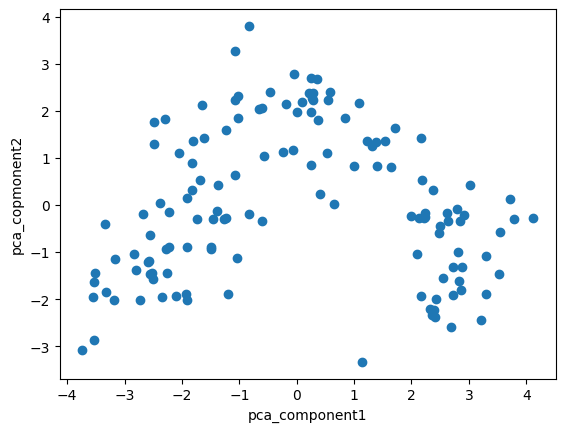

In [20]:
# no label pca data
import matplotlib.pyplot as plt
plt.scatter(X_train_pca_df['pca_comp1'],
            X_train_pca_df['pca_comp2'],
            marker='o')
plt.xlabel('pca_component1')
plt.ylabel('pca_copmonent2')
plt.show()

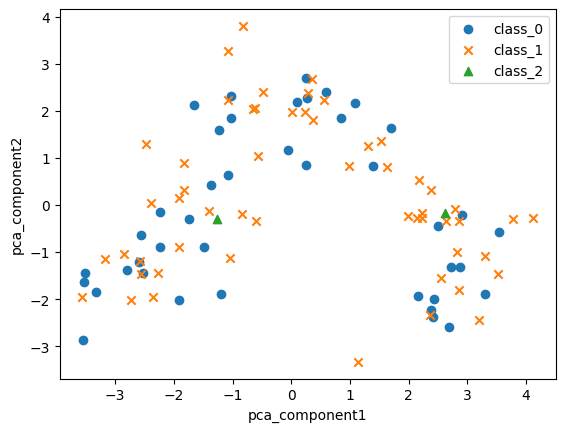

In [22]:
# label pca data
df = X_train_pca_df
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]
df_2 = df[df['target'] == 2]

X_11 = df_0['pca_comp1']
X_12 = df_1['pca_comp1']
X_13 = df_2['pca_comp1']

X_21 = df_0['pca_comp2']
X_22 = df_1['pca_comp2']
X_23 = df_2['pca_comp2']

target_0 = wine.target_names[0]
target_1 = wine.target_names[1]
target_2 = wine.target_names[2]

plt.scatter(X_11, X_21,
            marker='o',
            label=target_0)

plt.scatter(X_12, X_22,
            marker='x',
            label=target_1)

plt.scatter(X_13, X_23,
            marker='^',
            label=target_2)

plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()




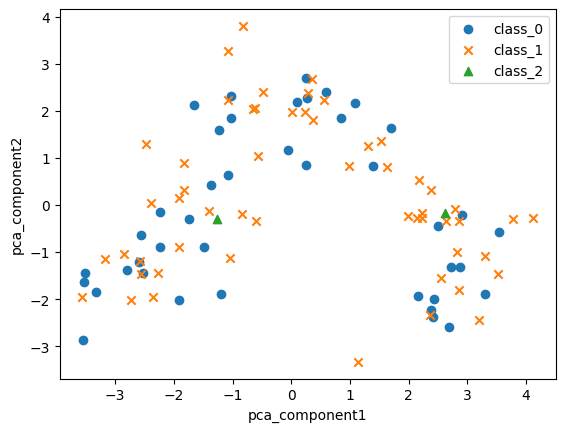

In [23]:
df = X_train_pca_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target'] == i]
    target_i = wine.target_names[i]
    X1 = df_i['pca_comp1']
    X2 = df_i['pca_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.legend()
plt.show()

In [26]:
# training before pca
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2,
                            random_state=0)
RF.fit(X_train_std, y_train)
pred_RF = RF.predict(X_test_std)

from sklearn.metrics import accuracy_score
accuarcy = accuracy_score(y_test, pred_RF)
print(accuarcy)

0.9777777777777777


In [27]:
# training after pca
RF2 = RandomForestClassifier(max_depth=2,
                            random_state=0)
RF2.fit(X_train_pca, y_train)
pred_RF2 = RF2.predict(X_test_pca)

accuarcy = accuracy_score(y_test, pred_RF2)
print(accuarcy)

0.9555555555555556
